# pivot table 이용하자!!!!! 정확도 오른다!!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/멋쟁이사자차럼/data/"
DATA_PATH

'/content/drive/MyDrive/멋쟁이사자차럼/data/'

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
train_tr = pd.read_csv("/content/drive/MyDrive/멋쟁이사자차럼/data/store_train_transactions.csv")
# train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

In [ ]:
from IPython.display import display, HTML
br_html = HTML("<br><br>")
display(HTML("<h1>학습용 구매기록 데이터</h1>"), train_tr.head(), br_html)
display(HTML("<h1>학습용 정답 데이터</h1>"), train_target.head(), br_html)
display(HTML("<h1>테스트용 구매기록 데이터</h1>"), test_tr.head(), br_html)
display(HTML("<h1>제출 양식 데이터</h1>"), submit.head(), br_html)

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,train_13219,2004-05-01 09:40:00,A144000,공산품파트,차류,5100,59700
1,train_5590,2004-05-01 09:40:00,A144000,잡화파트,화장잡화,5101,17000
2,train_7200,2004-05-01 10:20:00,A112000,공산품,용기보증,5100,34937
3,train_3010,2004-05-01 10:30:00,A373000,아동_스포츠,아동복,5105,19000
4,train_10851,2004-05-01 10:30:00,A112000,가정용품,전화기_카세트,5110,215000


,ID,target
0,train_0,1.0
1,train_1,1.0
2,train_2,0.0
3,train_3,0.0
4,train_4,0.0


,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
0,test_3366,2004-05-01 10:20:00,A373000,생식품,건식품,5100,7000
1,test_9389,2004-05-01 10:23:00,A373000,명품잡화,스타킹,5104,46000
2,test_8190,2004-05-01 10:30:00,A144000,잡화파트,수입종합화장품,5106,260000
3,test_8835,2004-05-01 10:30:00,A144000,잡화파트,준보석,5107,17000
4,test_1167,2004-05-01 10:30:00,A373000,남성의류,셔츠,5108,138000


,ID,target
0,test_0,0.5
1,test_1,0.5
2,test_2,0.5
3,test_3,0.5
4,test_4,0.5


In [ ]:
display(HTML("<h1>학습용 구매기록 데이터</h1>"))
display(train_tr.info(), br_html)

display(HTML("<h1>학습용 정답 데이터</h1>"))
display(train_target.info(), br_html)

display(HTML("<h1>테스트용 구매기록 데이터</h1>"))
display(test_tr.info(), br_html)

display(HTML("<h1>제출 양식 데이터</h1>"))
display(submit.info(), br_html)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523105 entries, 0 to 523104
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      523105 non-null  object
 1   구매일시    523105 non-null  object
 2   지점코드    523105 non-null  object
 3   대분류     523105 non-null  object
 4   중분류     523105 non-null  object
 5   브랜드코드   523105 non-null  int64 
 6   구매가격    523105 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 27.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      14940 non-null  object 
 1   target  14940 non-null  float64
dtypes: float64(1), object(1)
memory usage: 233.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441196 entries, 0 to 441195
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      441196 non-null  object
 1   구매일시    441196 non-null  object
 2   지점코드    441196 non-null  object
 3   대분류     441196 non-null  object
 4   중분류     441196 non-null  object
 5   브랜드코드   441196 non-null  int64 
 6   구매가격    441196 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 23.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12225 entries, 0 to 12224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      12225 non-null  object 
 1   target  12225 non-null  float64
dtypes: float64(1), object(1)
memory usage: 191.1+ KB


None

In [ ]:
train_target["target"].mean()

0.3931726907630522

In [ ]:
train_tr["ID"].nunique() , train_target.shape

(14940, (14940, 2))

In [ ]:
# 중분류 컬럼의 고유값 확인
unique_middle_categories = train_tr['중분류'].unique()
print(unique_middle_categories)

['차류' '화장잡화' '용기보증' '아동복' '전화기_카세트' '일용잡화' '수입종합화장품' '아동' '테이프' '수영복'
 '상품군미지정' '야채' '진케주얼' '단품' 'TV_VCR' '세탁기_냉장고' '트래디셔널' '완구(문화)' '캐릭터캐쥬얼'
 '주방용품' '문구_팬시' '수입부띠끄' '면류' '정육' '골프웨어' '유아용품' '패션시계' '골프(국내)' '진캐쥬얼'
 '색조화장품' '아웃도어' '양말' '영트랜드' '핸드백' '골프(LC)' '곡물' '행사_단품' '과자류' '니트웨어' '란제리'
 '완구' '스타킹' '향수' '수입향수' '레이디숍A' '명품' '문화' '단품_행사(트래디셔널)' '신생아' '팬시코너(문화)'
 '우산장갑' '셔츠' '영캐쥬얼' '행사' '칼라드래디셔널' '생선' '아동잡화' '스카프' '하이캐쥬얼' '타운웨어' '영캐주얼'
 '남성잡화' '캐릭터' '소형취사가전' '유아복' '헤어ACC' '로얄부틱2F' '타운단품' '캐리어캐쥬얼' '진캐주얼' '침구'
 '청과' '일반조리' '부띠끄' '모자' '디자이너' '캐릭터캐주얼' '캐릭터슈즈' '디자이너부띠끄' '슈즈' '냉장식품'
 '패션란제리' '수입액세서리' '손수건' '잡화' '스포츠웨어' '캐쥬얼구두' '즉석조리' '여성구두' '내의' '골프(수입)'
 '넥타이' '수입ACC' '잡화(문화)' '욕실용품' 'NB제화' 'L_B침구' '국산화장품' '디자이너숍' '썬그라스'
 '수입의류' '트레디셔널캐주얼' '준보석' '싸롱화' '트래디셔널캐쥬얼' '화장품' '수입캐주얼' '수입' '미씨캐릭터'
 '라이센스' '구두임대' '타운' '국내화장품' '잡화토탈' '엘레강스부틱' '건강식품' '임대구두' '미시케쥬얼' '레포츠단품'
 '니트' '취사소형' '인텔리젼스캐주얼' '피혁B행사' '수입구두' '팬시' '행사핸드백' '스포츠캐주얼' '크리스탈'
 '베이직캐주얼' '디자이너니트' '토탈' '스포츠슈즈' '건식품' '어덜트' '우산_장갑' '레코드(문화)' '국내종

In [ ]:
train_tr.sort_values("ID").head(60)

,ID,구매일시,지점코드,대분류,중분류,브랜드코드,구매가격
141650,train_0,2004-07-29 17:13:00,A112000,패션잡화,싸롱화,5379,165000
321257,train_0,2004-12-09 12:30:00,A144000,남성정장스포츠,골프웨어,5409,-205000
181480,train_0,2004-09-01 17:53:00,A112000,가정용품,크리스탈,6164,234000
321255,train_0,2004-12-09 12:30:00,A144000,남성정장스포츠,골프웨어,5452,968400
321254,train_0,2004-12-09 12:30:00,A144000,남성정장스포츠,골프웨어,5452,-1076000
209076,train_0,2004-09-22 19:13:00,A112000,아동문화,아동,5231,157300
70074,train_0,2004-06-14 13:50:00,A144000,잡화파트,썬그라스,5578,320000
329905,train_0,2004-12-15 16:40:00,A144000,케주얼_구두_아동,완구,5207,35000
11309,train_0,2004-05-07 18:23:00,A112000,패션잡화,양말,5659,43500
141704,train_0,2004-07-29 17:33:00,A112000,패션잡화,수입종합화장품,5149,169000


# 특성 공학(Feature Engineering)

## 날짜 형식으로 변환

In [ ]:
train_tr["구매일시"] = pd.to_datetime(train_tr["구매일시"])
test_tr["구매일시"] = pd.to_datetime(test_tr["구매일시"])

In [ ]:
# max 최근 날짜 min 오래된 날짜
time_delta = train_tr["구매일시"].max() - train_tr["구매일시"].min()
time_delta

Timedelta('363 days 10:23:00')

In [ ]:
time_delta.days # 일만 뽑기

363

In [ ]:
time_delta.total_seconds() # 초만 뽑기

31400580.0

## 새로 만든 feature와 병합할 고객ID로만 이루어진 데이터프레임 생성

In [ ]:
train_tr = train_target[["ID"]]
test_tr = submit[["ID"]]

train_tr.shape, test_tr.shape

((14940, 1), (12225, 1))

In [ ]:
train_tr

,ID
0,train_0
1,train_1
2,train_2
3,train_3
4,train_4
...,...
14935,train_14935
14936,train_14936
14937,train_14937
14938,train_14938


## 구매일시를 이용한 특성생성

0~6 요일
series... 가 뭔지 일단 알아야 할듯 호호
왜도, 첨도... 구매금액으로

In [ ]:
agg_list = [
        # 컬럼명, 집계 방식
        ('내점일수','nunique'), #  고쳐야 된다고 한다.....
        ('구매주기', lambda x: int( (x.max() - x.min()).days / x.dt.date.nunique()) ),
        ('주말방문비율', lambda x: np.mean(x.dt.weekday>4)),
        ('봄_구매비율', lambda x: np.mean(x.dt.month.isin([3,4,5]))),
        ('여름_구매비율', lambda x: np.mean(x.dt.month.isin([6,7,8]))),
        ('가을_구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
        ('겨울_구매비율', lambda x: np.mean(x.dt.month.isin([1,2,12]))),
        ('주구매요일', lambda x: x.dt.weekday.mode()[0]),
        ('일별평균구매건수', lambda x:  x.count() / x.dt.date.nunique() ),
        ('거래개월수', lambda x: x.dt.date.astype(str).str[:-3].nunique() ),
    ]

tmp = train_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
train_tr = train_tr.merge(tmp, how='left',on="ID")
train_tr.head()

KeyError: 'Column not found: 구매일시'

In [ ]:
tmp = test_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,4
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,3
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,2
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,7
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,4


## 지점을 이용한 특성생성

In [ ]:
agg_list = [
          ("방문지점수","nunique"),
          ('주구매지점', lambda x: x.mode()[0]),
    ]

tmp = train_tr.groupby('ID')["지점코드"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,7,2,A144000
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,11,3,A112000
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,12,2,A373000
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,12,3,A144000
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,10,2,A144000


In [ ]:
tmp = test_tr.groupby('ID')["지점코드"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,4,1,A202000
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,3,2,A373000
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,2,1,A144000
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,7,1,A112000
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,4,3,A112000


## 브랜드코드를 이용한 특성생성

In [ ]:
agg_list = [
             ('브랜드코드_nunique', 'nunique'),
             ]

tmp = train_tr.groupby('ID')["브랜드코드"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left',on="ID")
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점,브랜드코드_nunique
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,7,2,A144000,13
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,11,3,A112000,26
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,12,2,A373000,58
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,12,3,A144000,99
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,10,2,A144000,23


In [ ]:
tmp = test_tr.groupby('ID')["브랜드코드"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left',on="ID")
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점,브랜드코드_nunique
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,4,1,A202000,5
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,3,2,A373000,4
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,2,1,A144000,5
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,7,1,A112000,19
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,4,3,A112000,13


## 중분류를 이용한 특성생성

In [ ]:
agg_list = [
            ('중분류_nunique', 'nunique'),
            ('주구매_중분류', lambda x: x.mode()[0]),
            ]
tmp = train_tr.groupby('ID')["중분류"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,7,2,A144000,13,11,골프웨어
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,11,3,A112000,26,24,영캐주얼
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,12,2,A373000,58,35,아웃도어
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,12,3,A144000,99,60,수입종합화장품
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,10,2,A144000,23,24,로얄부틱2F


In [ ]:
tmp = test_tr.groupby('ID')["중분류"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,4,1,A202000,5,4,용기보증
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,3,2,A373000,4,4,남성구두
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,2,1,A144000,5,4,수입종합화장품
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,7,1,A112000,19,12,수입종합화장품
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,4,3,A112000,13,12,칼라드래디셔널


## 대분류를 이용한 특성생성

In [ ]:
agg_list = [
            ('대분류_nunique', 'nunique'),
            ('주구매_대분류', lambda x: x.mode()[0]),
            ]

tmp = train_tr.groupby('ID')["대분류"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류,대분류_nunique,주구매_대분류
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,7,2,A144000,13,11,골프웨어,9,남성정장스포츠
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,11,3,A112000,26,24,영캐주얼,12,영플라자
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,12,2,A373000,58,35,아웃도어,14,명품잡화
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,12,3,A144000,99,60,수입종합화장품,16,케주얼_구두_아동
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,10,2,A144000,23,24,로얄부틱2F,8,명품잡화


In [ ]:
tmp = test_tr.groupby('ID')["대분류"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,방문지점수,주구매지점,브랜드코드_nunique,중분류_nunique,주구매_중분류,대분류_nunique,주구매_대분류
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,4,1,A202000,5,4,용기보증,5,공산품
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,3,2,A373000,4,4,남성구두,3,명품잡화
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,2,1,A144000,5,4,수입종합화장품,3,잡화파트
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,7,1,A112000,19,12,수입종합화장품,5,영플라자
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,4,3,A112000,13,12,칼라드래디셔널,6,여성캐주얼


## 구매가격을 이용한 특성생성

왜도, 첨도... 구매금액으로

In [ ]:
agg_list = [
        ('총구매액','sum'),
        ('구매건수', 'count'),
        ('평균구매액', "mean"),
        ('최대구매액', 'max'),
        ('최소구매액',lambda x: x[x > 0].min() ) ,
        ('환불금액',lambda x: x[x < 0].sum() ) ,
        ('환불건수', lambda x: ( x < 0 ).sum() ),
        ('구매금액표준편차',lambda x: x[x>0].std() ),
    ]

tmp = train_tr.groupby('ID')["구매가격"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left')
train_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,대분류_nunique,주구매_대분류,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차
0,train_0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,...,9,남성정장스포츠,4201200,20,210060.000000,1236000,20000,-2517000,3,403660.245259
1,train_1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,...,12,영플라자,5043025,42,120072.023810,698000,5600,0,0,126592.626144
2,train_2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,...,14,명품잡화,22135386,114,194170.052632,2770000,4400,-1072500,7,406609.265932
3,train_3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,...,16,케주얼_구두_아동,35594762,211,168695.554502,1492000,10000,-2867800,14,236976.860907
4,train_4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,...,8,명품잡화,3988866,62,64336.548387,1204000,7640,-6954400,13,308503.944915


In [ ]:
tmp = test_tr.groupby('ID')["구매가격"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left')
test_ft.head()

,ID,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,...,대분류_nunique,주구매_대분류,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차
0,test_0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,...,5,공산품,429579,7,61368.428571,110000,26643,0,0,32293.148313
1,test_1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,...,3,명품잡화,290600,4,72650.000000,118000,37600,0,0,33658.431336
2,test_2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,...,3,잡화파트,607000,5,121400.000000,326000,38000,0,0,117233.954126
3,test_3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,...,5,영플라자,2305740,32,72054.375000,403000,7040,-1092000,4,122556.774972
4,test_4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,...,6,여성캐주얼,1568690,21,74699.523810,376000,16200,-372200,3,94997.232393


## 강사님 피처 데이터

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# train_ft.to_csv(f"{DATA_PATH}train_ft.csv",index= False)
# test_ft.to_csv(f"{DATA_PATH}test_ft.csv",index= False)

In [ ]:
DATA_PATH = "/content/drive/MyDrive/멋쟁이사자차럼/data/"
DATA_PATH

'/content/drive/MyDrive/멋쟁이사자차럼/data/'

In [ ]:
train_ft = pd.read_csv(f"{DATA_PATH}train_ft.csv")
test_ft = pd.read_csv(f"{DATA_PATH}test_ft.csv")

## 내가 추가하는 피처

- 가격( 왜도 , 첨도 )

In [ ]:
# 왜도와 첨도를 계산할 특성 리스트
agg_list = [
    ('구매가격_왜도', lambda x: x.skew()),
    ('구매가격_첨도', lambda x: x.kurtosis())
]

# 학습 데이터에서 구매가격의 왜도와 첨도를 계산
tmp = train_tr.groupby('ID')["구매가격"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

# 테스트 데이터에서 구매가격의 왜도와 첨도를 계산
tmp = test_tr.groupby('ID')["구매가격"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")

- 시간대별! (아침/점심/저녁/야간)

In [ ]:
# 시간대별 구매 비율을 계산하는 피처
train_tr['구매시간대'] = train_tr['구매일시'].dt.hour // 6  # 4시간 단위로 구분
test_tr['구매시간대'] = test_tr['구매일시'].dt.hour // 6

agg_list = [
    ('아침구매비율', lambda x: np.mean(x == 0)),
    ('점심구매비율', lambda x: np.mean(x == 1)),
    ('저녁구매비율', lambda x: np.mean(x == 2)),
    ('야간구매비율', lambda x: np.mean(x == 3))
]

tmp = train_tr.groupby('ID')["구매시간대"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

tmp = test_tr.groupby('ID')["구매시간대"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")


- 최근 구매 경과 일수

In [ ]:
# 최근 구매일로부터 경과한 일수
train_tr['구매일시'] = pd.to_datetime(train_tr['구매일시'])
test_tr['구매일시'] = pd.to_datetime(test_tr['구매일시'])

agg_list = [
    ('최근구매_경과일수', lambda x: (train_tr['구매일시'].max() - x.max()).days)
]

tmp = train_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

tmp = test_tr.groupby('ID')["구매일시"].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")


- 중분류에서 아이용품 사는 사람은 기혼 예측

In [ ]:
# '유아용품'
train_tr['자녀용품구매'] = train_tr['중분류'].isin(['아동', '완구','유아용품']).astype(int)
test_tr['자녀용품구매'] = test_tr['중분류'].isin(['아동', '완구','유아용품']).astype(int)

# 피벗테이블을 이용해서 고객별 '자녀용품구매' 비율을 계산
agg_list = [
    ('자녀용품구매비율', lambda x: np.mean(x))
]

# 학습 데이터에서 자녀용품 구매 비율 계산
tmp = train_tr.groupby('ID')['자녀용품구매'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

# 테스트 데이터에서 자녀용품 구매 비율 계산
tmp = test_tr.groupby('ID')['자녀용품구매'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")


In [ ]:
#'아동', '완구' 구매 여부를 확인하는 새로운 컬럼 생성
train_tr['자녀용품구매'] = train_tr['중분류'].isin(['아동', '완구']).astype(int)
test_tr['자녀용품구매'] = test_tr['중분류'].isin(['아동', '완구']).astype(int)

#피벗테이블을 이용해서 고객별 '자녀용품구매' 비율을 계산
agg_list = [
   ('자녀용품구매비율', lambda x: np.mean(x))
]

#학습 데이터에서 자녀용품 구매 비율 계산
tmp = train_tr.groupby('ID')['자녀용품구매'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

#테스트 데이터에서 자녀용품 구매 비율 계산
tmp = test_tr.groupby('ID')['자녀용품구매'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")

- 대분류에서 아동용품 구매 유무

In [ ]:
# '대분류'에서 '아동'을 구매한 고객을 표시하는 새로운 컬럼 생성
train_tr['아동상품구매'] = train_tr['대분류'].str.contains('아동').astype(int)
test_tr['아동상품구매'] = test_tr['대분류'].str.contains('아동').astype(int)

# 피벗테이블을 이용해서 고객별 '아동상품구매' 비율을 계산
agg_list = [
    ('아동상품구매비율', lambda x: np.mean(x))
]

# 학습 데이터에서 아동 상품 구매 비율 계산
tmp = train_tr.groupby('ID')['아동상품구매'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

# 테스트 데이터에서 아동 상품 구매 비율 계산
tmp = test_tr.groupby('ID')['아동상품구매'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")


- 대분류에서 영캐릭터 (캐치티니핑..)

In [ ]:
# '대분류'에서 '영캐릭터'를 구매한 고객을 표시하는 새로운 컬럼 생성
train_tr['영캐릭터구매'] = train_tr['대분류'].str.contains('영캐릭터').astype(int)
test_tr['영캐릭터구매'] = test_tr['대분류'].str.contains('영캐릭터').astype(int)

# 피벗테이블을 이용해서 고객별 '영캐릭터구매' 비율을 계산
agg_list = [
    ('영캐릭터구매비율', lambda x: np.mean(x))
]

# 학습 데이터에서 영캐릭터 상품 구매 비율 계산
tmp = train_tr.groupby('ID')['영캐릭터구매'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

# 테스트 데이터에서 영캐릭터 상품 구매 비율 계산
tmp = test_tr.groupby('ID')['영캐릭터구매'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")


- 골프 치는 사람 나이 있을 것임 > 기혼

In [ ]:
#'중분류'에서 '골프웨어'를 구매한 고객을 표시하는 새로운 컬럼 생성
train_tr['골프웨어구매'] = train_tr['중분류'].str.contains('골프웨어').astype(int)
test_tr['골프웨어구매'] = test_tr['중분류'].str.contains('골프웨어').astype(int)

#피벗테이블을 이용해서 고객별 '골프웨어구매' 비율을 계산
agg_list = [
   ('골프웨어구매비율', lambda x: np.mean(x))
]

#학습 데이터에서 골프웨어 구매 비율 계산
tmp = train_tr.groupby('ID')['골프웨어구매'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

#테스트 데이터에서 골프웨어 구매 비율 계산
tmp = test_tr.groupby('ID')['골프웨어구매'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")

- 생식품 많이 사면 가족구성원 많을것임 > 기혼

In [ ]:
# '대분류'에서 '생식품'을 구매한 고객의 데이터를 필터링하고, 구매 가격 구간을 나누기
train_tr['생식품_구매'] = train_tr['대분류'].str.contains('생식품').astype(int)
test_tr['생식품_구매'] = test_tr['대분류'].str.contains('생식품').astype(int)

# 생식품 구매 데이터에 한해서 구매 가격을 구간으로 나누기 (저가, 중가, 고가, 매우 고가)
train_tr['생식품_구매가격_구간'] = pd.cut(train_tr.loc[train_tr['생식품_구매'] == 1, '구매가격'],
                                      bins=[0, 10000, 20000, 30000, float('inf')],
                                      labels=['저가', '중가', '고가', '매우 고가'])

# 테스트 데이터에서도 동일하게 적용
test_tr['생식품_구매가격_구간'] = pd.cut(test_tr.loc[test_tr['생식품_구매'] == 1, '구매가격'],
                                      bins=[0, 10000, 20000, 30000, float('inf')],
                                      labels=['저가', '중가', '고가', '매우 고가'])

# 구간별로 구매 비율을 계산하는 새로운 피처 생성
agg_list = [
    ('생식품_저가_구매비율', lambda x: np.mean(x == '저가')),
    ('생식품_중가_구매비율', lambda x: np.mean(x == '중가')),
    ('생식품_고가_구매비율', lambda x: np.mean(x == '고가')),
    ('생식품_매우고가_구매비율', lambda x: np.mean(x == '매우 고가'))
]

# 학습 데이터에서 생식품 구매가격 구간별 구매 비율 계산
tmp = train_tr.groupby('ID')['생식품_구매가격_구간'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

# 테스트 데이터에서도 동일하게 적용
tmp = test_tr.groupby('ID')['생식품_구매가격_구간'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")

-  냉장고, 세탁기에 돈 많이 쓸수록 기혼 확률 높지 않을까?

In [ ]:
#'중분류'에서 '냉장고.세탁기'를 구매한 고객의 데이터를 필터링하고, 구매 가격 구간을 나누기
train_tr['냉장고_세탁기_구매'] = train_tr['중분류'].str.contains('냉장고.세탁기').astype(int)
test_tr['냉장고_세탁기_구매'] = test_tr['중분류'].str.contains('냉장고.세탁기').astype(int)

#냉장고.세탁기 구매 데이터에 한해서 구매 가격을 3개 구간으로 나누기 (저가, 중가, 고가)
train_tr['냉장고_세탁기_구매가격_구간'] = pd.cut(train_tr.loc[train_tr['냉장고_세탁기_구매'] == 1, '구매가격'],
                                     bins=[0, 1000000, 2000000, float('inf')],
                                     labels=['저가', '중가', '고가'])

#테스트 데이터에서도 동일하게 적용
test_tr['냉장고_세탁기_구매가격_구간'] = pd.cut(test_tr.loc[test_tr['냉장고_세탁기_구매'] == 1, '구매가격'],
                                     bins=[0, 1000000, 2000000, float('inf')],
                                     labels=['저가', '중가', '고가'])

#구간별로 구매 비율을 계산하는 새로운 피처 생성
agg_list = [
  ('냉장고_세탁기_저가_구매비율', lambda x: np.mean(x == '저가')),
   ('냉장고_세탁기_중가_구매비율', lambda x: np.mean(x == '중가')),
   ('냉장고_세탁기_고가_구매비율', lambda x: np.mean(x == '고가'))
]

#학습 데이터에서 냉장고.세탁기 구매가격 구간별 구매 비율 계산
tmp = train_tr.groupby('ID')['냉장고_세탁기_구매가격_구간'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

#테스트 데이터에서도 동일하게 적용
tmp = test_tr.groupby('ID')['냉장고_세탁기_구매가격_구간'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")

- 교복 구매하는 사람 > 기혼 아닐까

In [ ]:
#'중분류'에서 '교복행사'를 구매한 고객을 기혼으로 가정하여 피처 생성
train_tr['교복행사_구매'] = train_tr['중분류'].str.contains('교복행사').astype(int)
test_tr['교복행사_구매'] = test_tr['중분류'].str.contains('교복행사').astype(int)

#고객별로 '교복행사' 구매 여부를 계산
agg_list = [
   ('교복행사_구매비율', 'mean')
]

#학습 데이터에서 고객별 '교복행사' 구매 비율 계산
tmp = train_tr.groupby('ID')['교복행사_구매'].agg(agg_list).reset_index()
train_ft = train_ft.merge(tmp, how='left', on="ID")

#테스트 데이터에서도 동일하게 적용
tmp = test_tr.groupby('ID')['교복행사_구매'].agg(agg_list).reset_index()
test_ft = test_ft.merge(tmp, how='left', on="ID")


In [ ]:
#구매 효율성 피처 생성: 총구매액 * 구매건수
train_ft['구매효율성'] = train_ft['총구매액'] / train_ft['구매건수']

#테스트 데이터에도 동일한 피처 생성
test_ft['구매효율성'] = test_ft['총구매액']/ test_ft['구매건수']

In [ ]:
# 생식품 구매 여부 필터링
train_tr['생식품_구매'] = train_tr['대분류'].str.contains('생식품').astype(int)
test_tr['생식품_구매'] = test_tr['대분류'].str.contains('생식품').astype(int)

# 생식품 구매 고객의 평균 구매 금액 및 구매 빈도 계산
# '구매가격'에 대해 'mean'과 'count' 두 가지 집계를 따로 계산
tmp_train_mean = train_tr[train_tr['생식품_구매'] == 1].groupby('ID')['구매가격'].mean().reset_index()
tmp_train_mean.columns = ['ID', '생식품_평균구매금액']

tmp_train_count = train_tr[train_tr['생식품_구매'] == 1].groupby('ID')['구매가격'].count().reset_index()
tmp_train_count.columns = ['ID', '생식품_구매빈도']

# 평균 구매 금액과 구매 빈도를 하나의 데이터프레임으로 병합
tmp_train = pd.merge(tmp_train_mean, tmp_train_count, on='ID')

# 테스트 데이터에서도 동일하게 적용
tmp_test_mean = test_tr[test_tr['생식품_구매'] == 1].groupby('ID')['구매가격'].mean().reset_index()
tmp_test_mean.columns = ['ID', '생식품_평균구매금액']

tmp_test_count = test_tr[test_tr['생식품_구매'] == 1].groupby('ID')['구매가격'].count().reset_index()
tmp_test_count.columns = ['ID', '생식품_구매빈도']

# 평균 구매 금액과 구매 빈도를 하나의 데이터프레임으로 병합
tmp_test = pd.merge(tmp_test_mean, tmp_test_count, on='ID')

# train_ft와 test_ft에 병합
train_ft = train_ft.merge(tmp_train, how='left', on='ID')
test_ft = test_ft.merge(tmp_test, how='left', on='ID')

# 생식품 평균 구매 금액이 높고 구매 빈도도 높은 사람을 기혼으로 추정하는 피처 생성
train_ft['생식품_기혼추정'] = ((train_ft['생식품_평균구매금액'] > train_ft['생식품_평균구매금액'].median()) &
                           (train_ft['생식품_구매빈도'] > train_ft['생식품_구매빈도'].median())).astype(int)

test_ft['생식품_기혼추정'] = ((test_ft['생식품_평균구매금액'] > test_ft['생식품_평균구매금액'].median()) &
                          (test_ft['생식품_구매빈도'] > test_ft['생식품_구매빈도'].median())).astype(int)

- 기혼은 방학때 소비가 커지고, 미혼은 계속 비슷하지 않을까?

In [ ]:
# 구매일시에서 월 정보를 추출하여 월별 구매 금액 계산
train_tr['구매월'] = train_tr['구매일시'].dt.month

# ID별 월별 구매 금액의 표준편차를 계산하여 변동성 측정
tmp_train = train_tr.groupby('ID')['구매가격'].std().reset_index()
tmp_train.columns = ['ID', '구매금액_변동성']

# 테스트 데이터에서도 동일하게 적용
tmp_test = test_tr.groupby('ID')['구매가격'].std().reset_index()
tmp_test.columns = ['ID', '구매금액_변동성']

# train_ft와 test_ft에 병합
train_ft = train_ft.merge(tmp_train, how='left', on='ID')
test_ft = test_ft.merge(tmp_test, how='left', on='ID')


In [ ]:
# 특정 대분류(생필품, 가전, 주방용품 등)의 구매 금액 합계 계산
categories_of_interest = ['생필품', '가전제품', '주방용품']

for category in categories_of_interest:
    train_tr[category + '_구매'] = train_tr['대분류'].str.contains(category).astype(int)
    test_tr[category + '_구매'] = test_tr['대분류'].str.contains(category).astype(int)

    # 카테고리별 구매 금액 합계 계산
    train_tr[category + '_구매금액'] = train_tr[category + '_구매'] * train_tr['구매가격']
    test_tr[category + '_구매금액'] = test_tr[category + '_구매'] * test_tr['구매가격']

    # ID별 해당 카테고리에서의 총 구매 금액 계산
    tmp_train = train_tr.groupby('ID')[category + '_구매금액'].sum().reset_index()
    tmp_train.columns = ['ID', category + '_총구매금액']

    tmp_test = test_tr.groupby('ID')[category + '_구매금액'].sum().reset_index()
    tmp_test.columns = ['ID', category + '_총구매금액']

    # 상위 소비자 여부: 상위 10%에 해당하는 고객을 상위 소비자로 표시
    top_10_percent_threshold_train = tmp_train[category + '_총구매금액'].quantile(0.9)
    tmp_train[category + '_상위소비자'] = (tmp_train[category + '_총구매금액'] > top_10_percent_threshold_train).astype(int)

    top_10_percent_threshold_test = tmp_test[category + '_총구매금액'].quantile(0.9)
    tmp_test[category + '_상위소비자'] = (tmp_test[category + '_총구매금액'] > top_10_percent_threshold_test).astype(int)

    # train_ft와 test_ft에 병합
    train_ft = train_ft.merge(tmp_train[['ID', category + '_상위소비자']], how='left', on='ID')
    test_ft = test_ft.merge(tmp_test[['ID', category + '_상위소비자']], how='left', on='ID')


## 파이널_추가피처

- 모피,로얄 품목가격을 비교/ 비쌀수록 연령대가 높을것

In [ ]:
# 중분류에서 '모피'와 '로얄' 구매 여부를 표시하는 변수 생성
train_tr['모피_구매'] = train_tr['중분류'].str.contains('모피').astype(int)
test_tr['모피_구매'] = test_tr['중분류'].str.contains('모피').astype(int)

train_tr['로얄_구매'] = train_tr['중분류'].str.contains('로얄').astype(int)
test_tr['로얄_구매'] = test_tr['중분류'].str.contains('로얄').astype(int)

# 모피 구매 데이터에 한해서 구매 가격 구간 나누기
train_tr['모피_구매가격_구간'] = pd.cut(train_tr.loc[train_tr['모피_구매'] == 1, '구매가격'],
                                      bins=[0, 50000, 100000, 200000, float('inf')],
                                      labels=['저가', '중가', '고가', '매우 고가'])

test_tr['모피_구매가격_구간'] = pd.cut(test_tr.loc[test_tr['모피_구매'] == 1, '구매가격'],
                                     bins=[0, 50000, 100000, 200000, float('inf')],
                                     labels=['저가', '중가', '고가', '매우 고가'])

# 로얄 구매 데이터에 한해서 구매 가격 구간 나누기
train_tr['로얄_구매가격_구간'] = pd.cut(train_tr.loc[train_tr['로얄_구매'] == 1, '구매가격'],
                                      bins=[0, 50000, 100000, 200000, float('inf')],
                                      labels=['저가', '중가', '고가', '매우 고가'])

test_tr['로얄_구매가격_구간'] = pd.cut(test_tr.loc[test_tr['로얄_구매'] == 1, '구매가격'],
                                     bins=[0, 50000, 100000, 200000, float('inf')],
                                     labels=['저가', '중가', '고가', '매우 고가'])

# 모피와 로얄 구매 구간별 구매 비율 피처 생성
agg_list_mopi = [
    ('모피_저가_구매비율', lambda x: np.mean(x == '저가')),
    ('모피_중가_구매비율', lambda x: np.mean(x == '중가')),
    ('모피_고가_구매비율', lambda x: np.mean(x == '고가')),
    ('모피_매우고가_구매비율', lambda x: np.mean(x == '매우 고가'))
]

agg_list_royal = [
    ('로얄_저가_구매비율', lambda x: np.mean(x == '저가')),
    ('로얄_중가_구매비율', lambda x: np.mean(x == '중가')),
    ('로얄_고가_구매비율', lambda x: np.mean(x == '고가')),
    ('로얄_매우고가_구매비율', lambda x: np.mean(x == '매우 고가'))
]

# 학습 데이터에서 모피와 로얄 구매 가격 구간별 구매 비율 계산
tmp_mopi = train_tr.groupby('ID')['모피_구매가격_구간'].agg(agg_list_mopi).reset_index()
train_ft = train_ft.merge(tmp_mopi, how='left', on="ID")

tmp_royal = train_tr.groupby('ID')['로얄_구매가격_구간'].agg(agg_list_royal).reset_index()
train_ft = train_ft.merge(tmp_royal, how='left', on="ID")

# 테스트 데이터에서도 동일하게 적용
tmp_mopi = test_tr.groupby('ID')['모피_구매가격_구간'].agg(agg_list_mopi).reset_index()
test_ft = test_ft.merge(tmp_mopi, how='left', on="ID")

tmp_royal = test_tr.groupby('ID')['로얄_구매가격_구간'].agg(agg_list_royal).reset_index()
test_ft = test_ft.merge(tmp_royal, how='left', on="ID")


- 남성용품과 여성용품 같이산다

In [ ]:
# 여성용품, 남성용품에 해당하는 중분류 리스트 정의
female_items = ['레이디숍A', '영캐쥬얼', '여성구두', '패션란제리', '패션악세사리', '피혁소품', '마담SIZE', '엘레강스캐주얼', '디자이너니트', '엘레강스']
male_items = ['남성정장스포츠', '남성잡화', '남성구두', '타운단품', '넥타이']

# 여성용품과 남성용품 구매 여부를 나타내는 변수 생성
train_tr['여성용품_구매'] = train_tr['중분류'].isin(female_items).astype(int)
test_tr['여성용품_구매'] = test_tr['중분류'].isin(female_items).astype(int)

train_tr['남성용품_구매'] = train_tr['중분류'].isin(male_items).astype(int)
test_tr['남성용품_구매'] = test_tr['중분류'].isin(male_items).astype(int)

# 고객별로 여성용품과 남성용품을 모두 구매했는지 확인
tmp = train_tr.groupby('ID').apply(lambda x: int(x['여성용품_구매'].max() == 1 and x['남성용품_구매'].max() == 1)).reset_index()
tmp.columns = ['ID', '여성_남성_둘다_구매']

# 원래 데이터프레임에 병합
train_tr = train_tr.merge(tmp, how='left', on='ID')
test_tr = test_tr.merge(tmp, how='left', on='ID')

<ipython-input-194-578dd05216b2>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = train_tr.groupby('ID').apply(lambda x: int(x['여성용품_구매'].max() == 1 and x['남성용품_구매'].max() == 1)).reset_index()


- 행사 + 시간(야간 / 주간, 주중/주말)

In [ ]:
import numpy as np

# '행사' 품목 구매 여부를 나타내는 변수 생성
train_tr['행사_구매'] = train_tr['중분류'].str.contains('행사').astype(int)
test_tr['행사_구매'] = test_tr['중분류'].str.contains('행사').astype(int)

# 주간/야간 변수 생성: 6시부터 17시까지는 주간, 그 외 시간은 야간으로 설정
train_tr['주간야간'] = np.where(train_tr['구매일시'].dt.hour.between(6, 17), '주간', '야간')
test_tr['주간야간'] = np.where(test_tr['구매일시'].dt.hour.between(6, 17), '주간', '야간')

# 주중/주말 변수 생성: 월요일(0)부터 금요일(4)까지는 주중, 토요일(5)과 일요일(6)은 주말로 설정
train_tr['주중주말'] = np.where(train_tr['구매일시'].dt.weekday < 5, '주중', '주말')
test_tr['주중주말'] = np.where(test_tr['구매일시'].dt.weekday < 5, '주중', '주말')

# 행사 품목 구매 시 주간/야간, 주중/주말별 구매 여부를 나타내는 변수 생성
train_tr['행사_주간야간'] = np.where(train_tr['행사_구매'] == 1, train_tr['주간야간'], np.nan)
test_tr['행사_주간야간'] = np.where(test_tr['행사_구매'] == 1, test_tr['주간야간'], np.nan)

train_tr['행사_주중주말'] = np.where(train_tr['행사_구매'] == 1, train_tr['주중주말'], np.nan)
test_tr['행사_주중주말'] = np.where(test_tr['행사_구매'] == 1, test_tr['주중주말'], np.nan)

# 고객별 행사 구매 시 주간/야간, 주중/주말 비율 계산
agg_list = [
    ('행사_주간_비율', lambda x: np.mean(x == '주간')),
    ('행사_야간_비율', lambda x: np.mean(x == '야간')),
    ('행사_주중_비율', lambda x: np.mean(x == '주중')),
    ('행사_주말_비율', lambda x: np.mean(x == '주말'))
]

# 학습 데이터에서 고객별 행사 구매 비율 계산
tmp = train_tr.groupby('ID')[['행사_주간야간', '행사_주중주말']].agg({
    '행사_주간야간': [('행사_주간_비율', lambda x: np.mean(x == '주간')),
                      ('행사_야간_비율', lambda x: np.mean(x == '야간'))],
    '행사_주중주말': [('행사_주중_비율', lambda x: np.mean(x == '주중')),
                      ('행사_주말_비율', lambda x: np.mean(x == '주말'))]
}).reset_index()

# 컬럼명 수정
tmp.columns = ['ID', '행사_주간_비율', '행사_야간_비율', '행사_주중_비율', '행사_주말_비율']

# train_ft와 test_ft에 각각 행사 구매 비율 병합
train_ft = train_ft.merge(tmp, how='left', on='ID')

tmp = test_tr.groupby('ID')[['행사_주간야간', '행사_주중주말']].agg({
    '행사_주간야간': [('행사_주간_비율', lambda x: np.mean(x == '주간')),
                      ('행사_야간_비율', lambda x: np.mean(x == '야간'))],
    '행사_주중주말': [('행사_주중_비율', lambda x: np.mean(x == '주중')),
                      ('행사_주말_비율', lambda x: np.mean(x == '주말'))]
}).reset_index()

# 컬럼명 수정
tmp.columns = ['ID', '행사_주간_비율', '행사_야간_비율', '행사_주중_비율', '행사_주말_비율']
test_ft = test_ft.merge(tmp, how='left', on='ID')


- 7번

In [ ]:
# 아동 여부 분류: '아동'이라는 단어가 포함된 경우 아동, 그렇지 않으면 성인으로 설정
train_tr['대분류_연령대'] = np.where(train_tr['대분류'].str.contains('아동'), '아동', '성인')
test_tr['대분류_연령대'] = np.where(test_tr['대분류'].str.contains('아동'), '아동', '성인')

# 성별 분류: '남성'이라는 단어가 포함된 경우 남성, '여성'이라는 단어가 포함된 경우 여성으로 설정
train_tr['대분류_성별'] = np.where(train_tr['대분류'].str.contains('남성'), '남성',
                        np.where(train_tr['대분류'].str.contains('여성'), '여성', '기타'))
test_tr['대분류_성별'] = np.where(test_tr['대분류'].str.contains('남성'), '남성',
                       np.where(test_tr['대분류'].str.contains('여성'), '여성', '기타'))

- 군집분석해서 중분류에서 자주 사는 상품들끼리 묶기

In [ ]:
# 고객-상품 매트릭스 생성 (구매 횟수 기준)
customer_product_matrix = train_tr.pivot_table(index='ID', columns='중분류', values='구매가격', aggfunc='count', fill_value=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 고객-상품 매트릭스에 Z-score 정규화 적용
scaler = StandardScaler()
customer_product_matrix_scaled = scaler.fit_transform(customer_product_matrix)

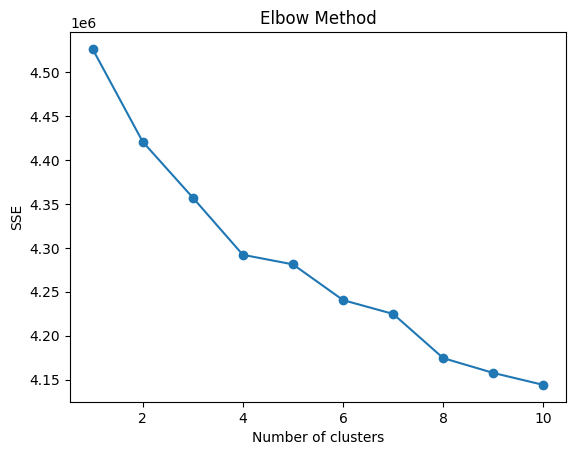

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method를 통해 최적의 군집 개수 찾기
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_product_matrix_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

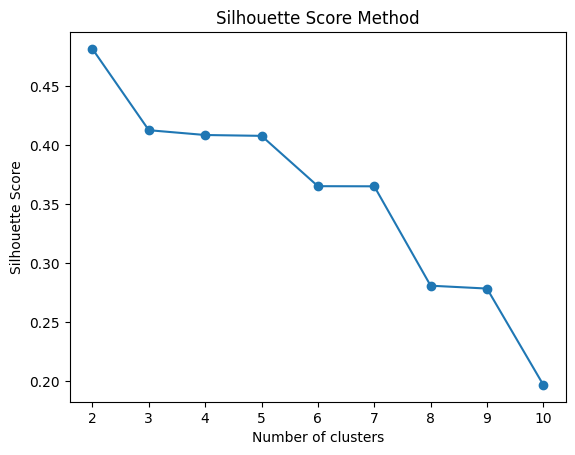

In [ ]:
# Silhouette Score 계산
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_product_matrix_scaled)
    silhouette_scores.append(silhouette_score(customer_product_matrix_scaled, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [ ]:
# KMeans를 사용한 군집화
optimal_k = 2  # 선택한 최적의 군집 개수
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_product_matrix['cluster'] = kmeans.fit_predict(customer_product_matrix_scaled)

# 각 군집의 주요 중분류 항목 확인
cluster_summary = customer_product_matrix.groupby('cluster').mean()

# 각 군집에서 가장 많이 구매된 중분류 확인
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(cluster_summary.loc[i].sort_values(ascending=False).head(30))  # 상위 10개 중분류 출력
    print("\n")


Cluster 0:
중분류
수입종합화장품    2.900382
용기보증       1.698375
영캐주얼       0.864355
진캐쥬얼       0.674481
상품군미지정     0.654258
란제리        0.599581
캐릭터        0.501760
아동복        0.449479
아동         0.388660
트래디셔널      0.373530
야채         0.332559
핸드백        0.324919
영트랜드       0.312636
셔츠         0.306719
주방용품       0.288143
골프웨어       0.282151
유아복        0.266871
스타킹        0.257434
진케주얼       0.246423
스포츠웨어      0.245300
일용잡화       0.243727
진캐주얼       0.242828
영캐쥬얼       0.223504
욕실용품       0.203505
색조화장품      0.202457
수영복        0.192120
청과         0.188750
스포츠캐주얼     0.182608
신생아        0.180061
골프(국내)     0.172946
Name: 0, dtype: float64


Cluster 1:
중분류
용기보증       14.188798
수입종합화장품     8.244179
야채          4.973568
청과          2.813090
란제리         2.786658
진캐쥬얼        2.704846
아동복         2.658276
상품군미지정      2.555695
주방용품        2.156702
아동          2.076778
영캐주얼        1.796098
영트랜드        1.783512
캐릭터         1.730019
일용잡화        1.729390
트래디셔널       1.692259
골프웨어        1.655129
진케주얼    

In [ ]:
# 클러스터별 상위 N개의 중분류 항목 추출 (예: 상위 30개 항목)
top_n = 15
cluster_0_top_categories = cluster_summary.loc[0].sort_values(ascending=False).head(top_n).index.tolist()
cluster_1_top_categories = cluster_summary.loc[1].sort_values(ascending=False).head(top_n).index.tolist()

print("Cluster 0 Top Categories:", cluster_0_top_categories)
print("Cluster 1 Top Categories:", cluster_1_top_categories)


Cluster 0 Top Categories: ['수입종합화장품', '용기보증', '영캐주얼', '진캐쥬얼', '상품군미지정', '란제리', '캐릭터', '아동복', '아동', '트래디셔널', '야채', '핸드백', '영트랜드', '셔츠', '주방용품']
Cluster 1 Top Categories: ['용기보증', '수입종합화장품', '야채', '청과', '란제리', '진캐쥬얼', '아동복', '상품군미지정', '주방용품', '아동', '영캐주얼', '영트랜드', '캐릭터', '일용잡화', '트래디셔널']


In [ ]:
# Cluster 0 주요 항목 구매 여부 피처 생성
train_tr['cluster_0_top_purchase'] = train_tr['중분류'].isin(cluster_0_top_categories).astype(int)
test_tr['cluster_0_top_purchase'] = test_tr['중분류'].isin(cluster_0_top_categories).astype(int)

# Cluster 1 주요 항목 구매 여부 피처 생성
train_tr['cluster_1_top_purchase'] = train_tr['중분류'].isin(cluster_1_top_categories).astype(int)
test_tr['cluster_1_top_purchase'] = test_tr['중분류'].isin(cluster_1_top_categories).astype(int)

## 결측치 처리

In [ ]:
train_ft.isnull().sum()

,0
ID,0
내점일수,0
구매주기,0
주말방문비율,0
봄_구매비율,0
...,...
로얄_매우고가_구매비율,0
행사_주간_비율,0
행사_야간_비율,0
행사_주중_비율,0


In [ ]:
test_ft.isnull().sum()

,0
ID,0
내점일수,0
구매주기,0
주말방문비율,0
봄_구매비율,0
...,...
로얄_매우고가_구매비율,0
행사_주간_비율,0
행사_야간_비율,0
행사_주중_비율,0


In [ ]:
train_ft = train_ft.fillna(0)
test_ft = test_ft.fillna(0)

train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

## Feature Encoding

- ID 컬럼 제거

In [ ]:
train_ft = train_ft.drop(columns="ID")
test_ft = test_ft.drop(columns="ID")

In [ ]:
cols = train_ft.select_dtypes("object").columns.tolist()
cols

['주구매지점', '주구매_중분류', '주구매_대분류']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")

In [ ]:
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols]).toarray(),
    columns =  enc.get_feature_names_out()
)

train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols)
train_ft.head()

,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,주구매_대분류_여성캐주얼,주구매_대분류_여성캐쥬얼,주구매_대분류_영라이브,주구매_대분류_영어덜트캐쥬얼,주구매_대분류_영캐릭터,주구매_대분류_영플라자,주구매_대분류_잡화,주구매_대분류_잡화파트,주구매_대분류_케주얼_구두_아동,주구매_대분류_패션잡화
0,16,23,0.250000,0.050000,0.250000,0.400000,0.300000,3,1.818182,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,16,0.023810,0.357143,0.166667,0.357143,0.119048,3,2.000000,11,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,102,6,0.210526,0.464912,0.140351,0.175439,0.219298,0,2.035714,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,191,3,0.189573,0.379147,0.180095,0.236967,0.203791,3,2.293478,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55,11,0.258065,0.112903,0.612903,0.209677,0.064516,4,2.296296,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)
test_ft.head()

,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,주구매_대분류_여성캐주얼,주구매_대분류_여성캐쥬얼,주구매_대분류_영라이브,주구매_대분류_영어덜트캐쥬얼,주구매_대분류_영캐릭터,주구매_대분류_영플라자,주구매_대분류_잡화,주구매_대분류_잡화파트,주구매_대분류_케주얼_구두_아동,주구매_대분류_패션잡화
0,7,32,0.571429,0.285714,0.285714,0.428571,0.000000,1,1.400000,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,54,0.250000,0.000000,0.000000,0.750000,0.250000,0,1.333333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,8,0.000000,0.000000,0.600000,0.400000,0.000000,0,2.500000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28,16,0.031250,0.062500,0.468750,0.343750,0.125000,3,2.000000,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,19,29,0.476190,0.380952,0.285714,0.238095,0.095238,6,2.333333,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
train_ft.head()

,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,주구매_대분류_여성캐주얼,주구매_대분류_여성캐쥬얼,주구매_대분류_영라이브,주구매_대분류_영어덜트캐쥬얼,주구매_대분류_영캐릭터,주구매_대분류_영플라자,주구매_대분류_잡화,주구매_대분류_잡화파트,주구매_대분류_케주얼_구두_아동,주구매_대분류_패션잡화
0,0.027778,0.130682,0.250000,0.050000,0.250000,0.400000,0.300000,0.500000,0.090909,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.074074,0.090909,0.023810,0.357143,0.166667,0.357143,0.119048,0.500000,0.111111,0.909091,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.187037,0.034091,0.210526,0.464912,0.140351,0.175439,0.219298,0.000000,0.115079,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.351852,0.017045,0.189573,0.379147,0.180095,0.236967,0.203791,0.500000,0.143720,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.100000,0.062500,0.258065,0.112903,0.612903,0.209677,0.064516,0.666667,0.144033,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_ft[test_ft.columns] = scaler.transform(test_ft)
test_ft.head()

,내점일수,구매주기,주말방문비율,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,주구매_대분류_여성캐주얼,주구매_대분류_여성캐쥬얼,주구매_대분류_영라이브,주구매_대분류_영어덜트캐쥬얼,주구매_대분류_영캐릭터,주구매_대분류_영플라자,주구매_대분류_잡화,주구매_대분류_잡화파트,주구매_대분류_케주얼_구두_아동,주구매_대분류_패션잡화
0,0.011111,0.181818,0.571429,0.285714,0.285714,0.428571,0.000000,0.166667,0.044444,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005556,0.306818,0.250000,0.000000,0.000000,0.750000,0.250000,0.000000,0.037037,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005556,0.045455,0.000000,0.000000,0.600000,0.400000,0.000000,0.000000,0.166667,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.050000,0.090909,0.031250,0.062500,0.468750,0.343750,0.125000,0.500000,0.111111,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.033333,0.164773,0.476190,0.380952,0.285714,0.238095,0.095238,1.000000,0.148148,0.272727,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 정답 데이터

In [ ]:
target = train_target["target"]
target

,target
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
14935,0.0
14936,0.0
14937,0.0
14938,1.0


# 데이터 분리(Data Split)
- 학습데이터와 검증데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_ft, target, test_size=0.2, random_state=42)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((11952, 340), (2988, 340), (11952,), (2988,))

# 모델 학습(Train Model)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
pred = model.predict(x_valid)
pred[:5]

array([0., 1., 1., 1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,pred)

0.7158634538152611

- 강사님 점수 : 669......
- 내꺼 1차 : 0.6703480589022758 / 0.6903885480572597 (구매가격 첨도 왜도)
- 내꺼 2차 : 0.6957831325301205 / 	0.718200408997955 (구매시간대)
- 내꺼 3차 : 0.6931057563587684 / 0.7192638036809816 (구매 경과)
- 내꺼 4차 : 0.7021419009370816 / 0.7215541922290388 (중분류- 아동물품)
- 내꺼 5차 : 0.7034805890227577 / 	0.7221267893660531 (대분류 - 아동)
- 내꺼 6차 : 0.7028112449799196 / 0.7231901840490798 (대분류 - 영캐릭터)
- 내꺼 7차 : 0.7038152610441767 / - (중분류 - 골프웨어) > 뺄까..? 고민
- 내꺼 8차 : 0.7095046854082999 / 0.7257259713701432 (식료품 - 가격 구간)
- 내꺼 9차 : 0.7085006693440429 / - (냉장고 - 가격구간) > 뺄까나....
- 내꺼 10차 : 0.70816599.... / (교복 구매 유무) > 빼야지...
- 내꺼 11차 : 0.7088353413654619 / - ( 구매 효율성 ) > 빼기 확정
- 내꺼 12차 : 0.7091700133868809 /
(아동용품 넣었다. 그래도 최고치보단 좀 떨어지는데)
- 내꺼 13차 : 0.7105087014725568 / - (여기선 올랐는데 페이지에선 안올랐다.... 아쉽다) (구매일시, 구매가격)

# 모델 평가(Model Evaluation)

- 전체 train 데이터를 다시 학습한다.

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(train_ft,target)

- 테스트 데이터 예측

In [ ]:
pred = model.predict(test_ft)
pred

In [ ]:
submit["target"] = pred
submit

In [ ]:
submit.to_csv("신혜빈.csv",index=False)